# Serpens total

In [1]:
import aplpy
from astropy.io import fits
%pylab inline
#%matplotlib widget
#plt.style.use(['dark_background'])
path = '/user/workdir/albouyg/Gouldbelt/Serpens/'
name = 'serpens'

Populating the interactive namespace from numpy and matplotlib


## Read and prepare the map

In [2]:
figfile = path + 'HGBS_' + name + '_column_density_map.fits'

In [3]:
#Read map
HDU = fits.open(figfile)
im = HDU[0].data
header = HDU[0].header

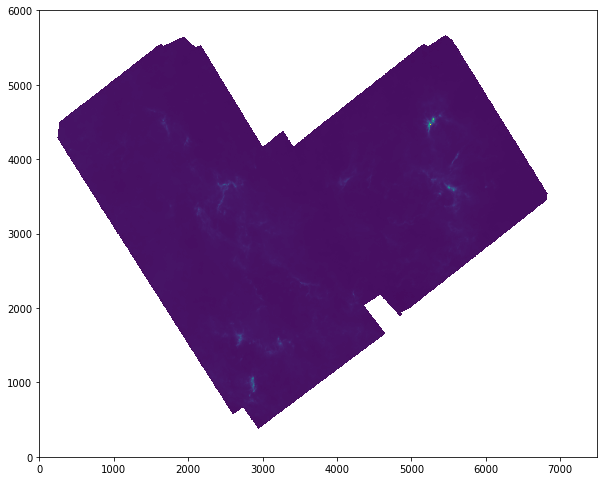

In [4]:
figure(figsize=(10,10))
imshow(im,origin='bottom')

INFO: Auto-setting vmin to -1.105e+21 [aplpy.core]
INFO: Auto-setting vmax to  1.509e+22 [aplpy.core]


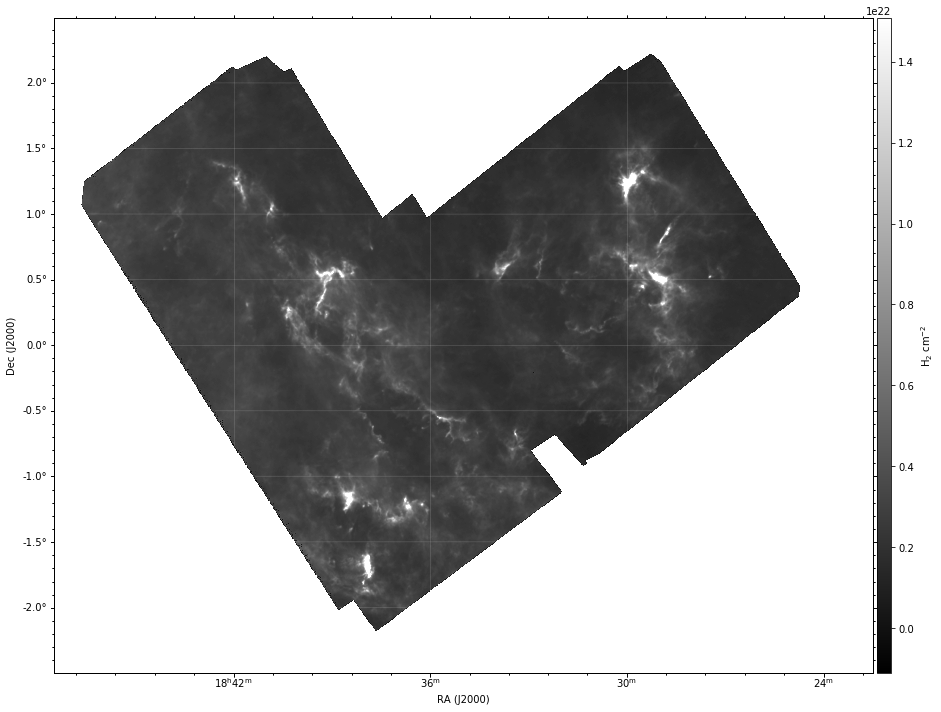

In [5]:
fig_all = plt.figure(1, figsize=(15,15))
fig = aplpy.FITSFigure(path + 'HGBS_' + name + '_column_density_map.fits',figure=fig_all)
fig.show_colorscale(cmap='gray')
fig.tick_labels.set_yformat('dd.d')
fig.ticks.set_yspacing(0.5)  # degrees
fig.add_colorbar()
fig.add_grid()
fig.grid.set_alpha(0.15)
fig.colorbar.set_axis_label_text(r'H$_2$ cm$^{-2}$')

In [6]:
header

SIMPLE  =                    T / Written by IDL:  Fri Sep 29 17:30:22 2017      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 7500                                                  
NAXIS2  =                 6000                                                  
COMMENT Science data image                                                      
CREATOR = 'IDL               '                                                  
TELESCOP= 'Herschel Space Observatory'                                          
INSTRUME= 'SPIRE/PACS'                                                          
PROPOSAL= 'KPGT_pandre_1'                                                       
PRTITLE = 'Herschel Gould Belt Survey (HGBS)'                                   
COMMENT Reference publication of the survey: Andre' et al. (2010)               
COMMENT bibcode: 2010A&A...5

In [7]:
from pywavan import powspec, fan_trans, apodize, padding, subfits, gauss_beam

INFO: Auto-setting vmin to  6.755e+20 [aplpy.core]
INFO: Auto-setting vmax to  1.562e+22 [aplpy.core]


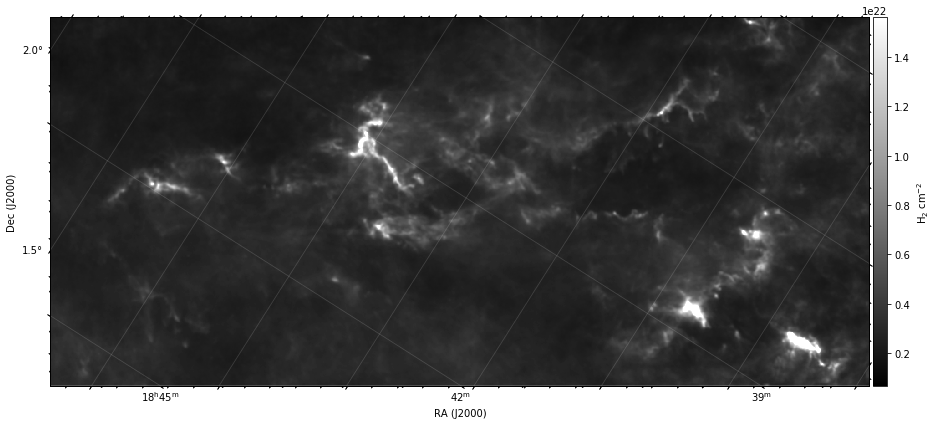

In [8]:
fig_all = plt.figure(1, figsize=(15,15))
fig = aplpy.FITSFigure(path + 'HGBS_' + name + '_column_density_map_rebin_rot_cut.fits',figure=fig_all)
fig.show_colorscale(cmap='gray')
fig.tick_labels.set_yformat('dd.d')
fig.ticks.set_yspacing(0.5)  # degrees
fig.add_colorbar()
fig.add_grid()
fig.grid.set_alpha(0.15)
fig.colorbar.set_axis_label_text(r'H$_2$ cm$^{-2}$')

INFO: Auto-setting vmin to -1.707e+20 [aplpy.core]
INFO: Auto-setting vmax to  1.892e+22 [aplpy.core]


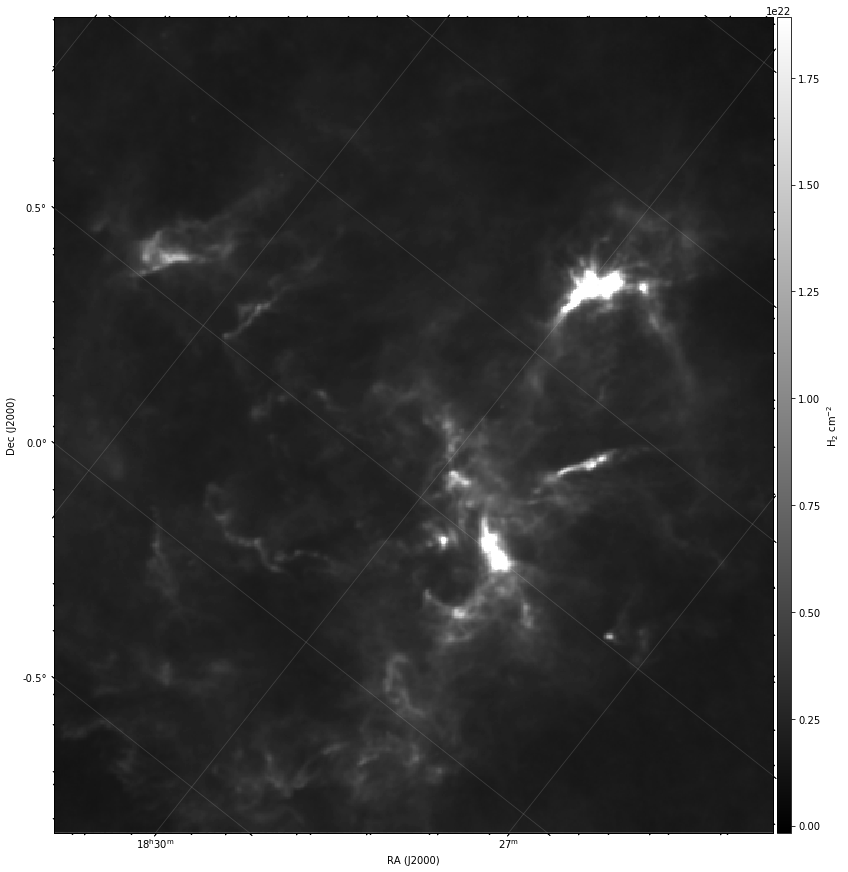

In [9]:
fig_all = plt.figure(1, figsize=(15,15))
fig = aplpy.FITSFigure(path + 'HGBS_' + name + '_bis' + '_column_density_map_rebin_rot_cut.fits',figure=fig_all)
fig.show_colorscale(cmap='gray')
fig.tick_labels.set_yformat('dd.d')
fig.ticks.set_yspacing(0.5)  # degrees
fig.add_colorbar()
fig.add_grid()
fig.grid.set_alpha(0.15)
fig.colorbar.set_axis_label_text(r'H$_2$ cm$^{-2}$')

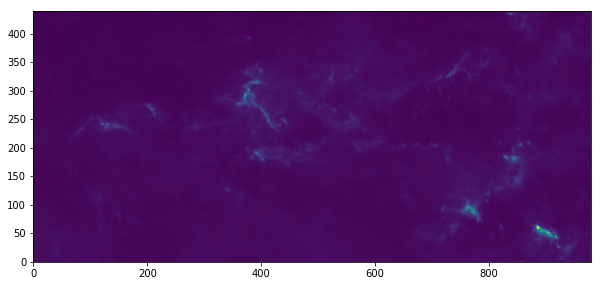

In [10]:
#Read map 1
HDU = fits.open(path + 'HGBS_' + name + '_column_density_map_rebin_rot_cut.fits')
im1 = HDU[0].data
header = HDU[0].header
figure(figsize=(10,10))
imshow(im1, origin='bottom')

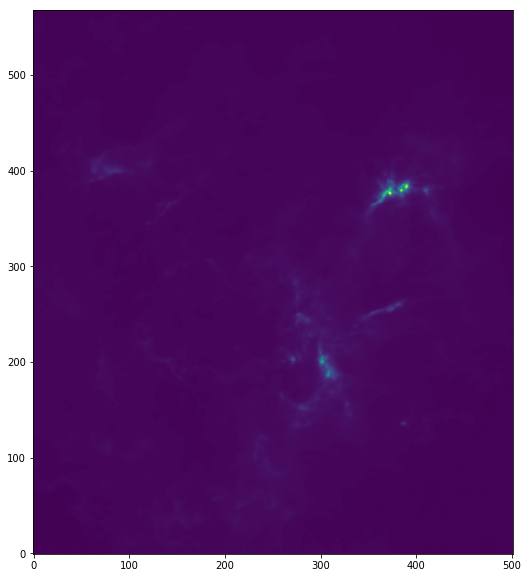

In [11]:
#Read map 2
HDU = fits.open(path + 'HGBS_' + name + '_bis' + '_column_density_map_rebin_rot_cut.fits')
im2 = HDU[0].data
header = HDU[0].header
figure(figsize=(10,10))
imshow(im2, origin='bottom')

In [12]:
#Resolution in arcmin
reso = HDU[0].header['CDELT2'] * 60.

meanim = np.mean(im1)
na = im1.shape[1]
nb = im1.shape[0]
imzm = im1 - meanim

#Apodization
tapper = apodize(nb,na,0.98)
imt = imzm *tapper
newdim = np.array((550,1100))
imr = padding(imt,newdim[0],newdim[1])

#Fourier power spectrum
tab_k, spec_k = powspec(imr, reso=reso)

In [13]:
#Set a list of q
q=[]
q=[2.5]*26

#Wavelet power spectrum
wt, S11a_1, wav_k, S1a_1, q = fan_trans(im1, reso=reso, q=q, qdyn=True, skewl=0.4, arrdim = newdim, smooth=False, angular=False, apodize=.98)

1100 550


In [14]:
#Resolution in arcmin
reso = HDU[0].header['CDELT2'] * 60.

meanim = np.mean(im2)
na = im2.shape[1]
nb = im2.shape[0]
imzm = im2 - meanim

#Apodization
tapper = apodize(nb,na,0.98)
imt = imzm *tapper
newdim = np.array((700,600))
imr = padding(imt,newdim[0],newdim[1])

#Fourier power spectrum
tab_k, spec_k = powspec(imr, reso=reso)

In [15]:
#Set a list of q
q=[]
q=[2.5]*26

#Wavelet power spectrum
wt, S11a_2, wav_k_2, S1a_2, q = fan_trans(im2, reso=reso, q=q, qdyn=True, skewl=0.4, arrdim = newdim, smooth=False, angular=False, apodize=.98, scales=wav_k)

600 700


In [17]:
M=wav_k.size
S1a_t=np.zeros([3,M])
for j in range(M):
    S1a_t[0,j]=np.sum(S11a_1[j,:,:])+np.sum(S11a_2[j,:,:])
    S1a_t[1,j]=np.sum(S11a_1[M+j,:,:])+np.sum(S11a_2[M+j,:,:])
    S1a_t[2,j]=np.sum(S11a_1[2*M+j,:,:])+np.sum(S11a_2[2*M+j,:,:])
    

Text(0.5, 1.0, 'Beam power spectrum')

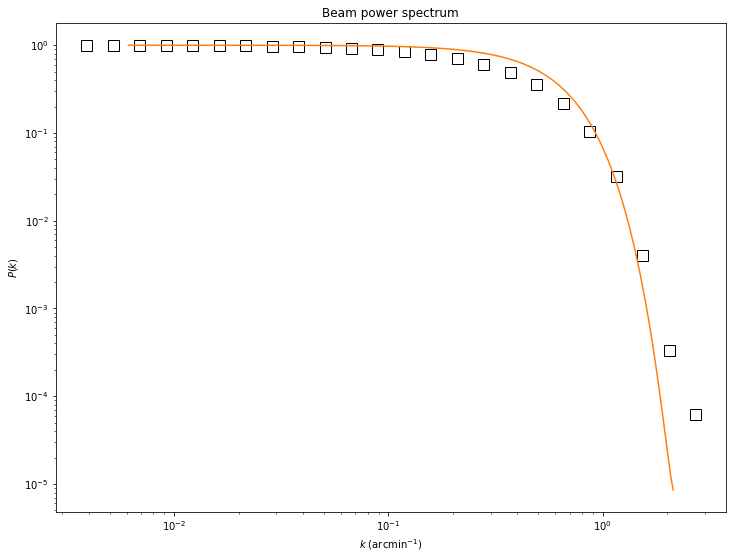

In [19]:
#Wavelet power spectrum of the telescope beam

beam = fits.open('/user/workdir/albouyg/Gouldbelt/empiral_spire_beam_500.fits')[0].data
beamr = padding(beam,newdim[0],newdim[1])

Bwt, BS11a, Bwav_k, BS1a, Bq = fan_trans(beamr, reso=reso, q=0, smooth=False, scales=wav_k)
del Bwt, BS11a, Bwav_k, Bq

tab_k, spec_beam2 = powspec(beamr,reso)
spec_beamn2 = spec_beam2 / spec_beam2[0]

#Spectrum normalisation
BS1an = BS1a / BS1a[6]
BS1an[:6] = 1.0

#Beam simulation
Sbeam = gauss_beam(36.9 / (60.*reso),newdim[0],newdim[1],FWHM=True)
tab_k, spec_beam = powspec(Sbeam,reso)
spec_beamn = spec_beam / spec_beam[0]

plt.figure(figsize(12,9))
plt.plot(wav_k, BS1an,'s', markersize = 11, markerfacecolor='none', markeredgecolor='black')
plt.plot(tab_k, spec_beamn)
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$k$ (arcmin$^{-1}$)')
plt.ylabel(r'$P(k)$')
plt.title('Beam power spectrum')

Power law fit
Coherent wavelet
A, Gamma, P0 =  1.8288155059113132e+48 -1.9663212196804651 0.0
Gaussian wavelet
A, Gamma, P0 =  8.579605600412946e+44 -3.7950576755049767 0.0


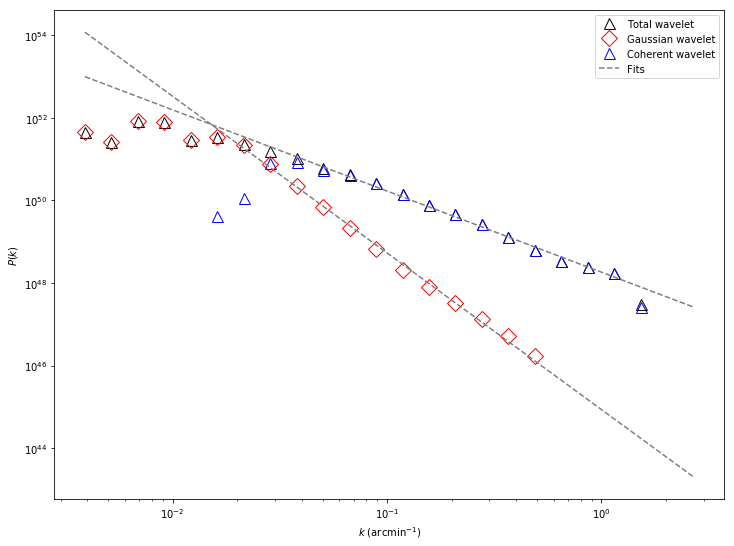

In [29]:
Noise = 0.5e46
#Noise = 0.0

#Power spectra fits
A_gauss, cov = np.polyfit(np.log(wav_k[6:17]), np.log((S1a_t[2,6:17]-Noise)/BS1an[6:17]),deg=1,cov=True)
fit_gauss = np.exp(A_gauss[1])*wav_k**A_gauss[0]
A_cohe, cov = np.polyfit(np.log(wav_k[8:20]), np.log((S1a_t[1,8:20]-Noise)/BS1an[8:20]),deg=1,cov=True)
fit_cohe = np.exp(A_cohe[1])*wav_k**A_cohe[0]

print('Power law fit')
print('Coherent wavelet')
print('A, Gamma, P0 = ', np.exp(A_cohe[1]), A_cohe[0], 0.)
print('Gaussian wavelet')
print('A, Gamma, P0 = ', np.exp(A_gauss[1]), A_gauss[0], 0.)

plt.figure(figsize(12,9))
plt.plot(wav_k, (S1a_t[0,:]-Noise)/BS1an,'^', markersize = 11, markerfacecolor='none', markeredgecolor='black', label='Total wavelet')
plt.plot(wav_k, (S1a_t[2,:]-Noise)/BS1an,'D', markersize = 11, markerfacecolor='none', markeredgecolor='red', label='Gaussian wavelet')
plt.plot(wav_k, (S1a_t[1,:]-Noise)/BS1an,'^', markersize = 11, markerfacecolor='none', markeredgecolor='blue', label='Coherent wavelet')

plt.plot(wav_k, fit_gauss, color='grey', ls='--', lw=1.5, label=r'Fits')
plt.plot(wav_k, fit_cohe, color='grey', ls='--', lw=1.5)

plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$k$ (arcmin$^{-1}$)')
plt.ylabel(r'$P(k)$')
plt.legend()

plt.savefig(path + 'HGBS_' + name +  '_tot_column_density_map_power_spec.png', dpi=500)